In [ ]:
from google.colab import files
uploaded=files.upload()

Saving archive (5).zip to archive (5).zip


In [ ]:
!unzip "archive (5).zip"

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        'flowers/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='training',
        classes=['rose', 'tulip'])

Found 1416 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
        'flowers/',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary',
        subset='validation',
        classes=['rose', 'tulip'])

Found 352 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples // train_generator.batch_size,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // validation_generator.batch_size)

Epoch 1/10
44/44 [==============================] - 73s 2s/step - loss: 0.6850 - accuracy: 0.5564 - val_loss: 0.6923 - val_accuracy: 0.5568
Epoch 2/10
44/44 [==============================] - 78s 2s/step - loss: 0.6682 - accuracy: 0.5441 - val_loss: 0.6914 - val_accuracy: 0.5568
Epoch 3/10
44/44 [==============================] - 72s 2s/step - loss: 0.6785 - accuracy: 0.5672 - val_loss: 0.6875 - val_accuracy: 0.5568
Epoch 4/10
44/44 [==============================] - 70s 2s/step - loss: 0.6813 - accuracy: 0.5506 - val_loss: 0.6859 - val_accuracy: 0.5568
Epoch 5/10
44/44 [==============================] - 75s 2s/step - loss: 0.6302 - accuracy: 0.6510 - val_loss: 0.6712 - val_accuracy: 0.6506
Epoch 6/10
44/44 [==============================] - 71s 2s/step - loss: 0.5773 - accuracy: 0.7023 - val_loss: 0.5700 - val_accuracy: 0.6932
Epoch 7/10
44/44 [==============================] - 72s 2s/step - loss: 0.5328 - accuracy: 0.7363 - val_loss: 0.5831 - val_accuracy: 0.6676
Epoch 8/10
44/44 [==

In [ ]:
model.evaluate(validation_generator)

11/11 [==============================] - 7s 612ms/step - loss: 0.5447 - accuracy: 0.7017


[0.5447430610656738, 0.7017045617103577]

In [ ]:
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt


def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150, 150))
    img = img.astype("float") / 255.0
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    return img

In [ ]:
def display_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

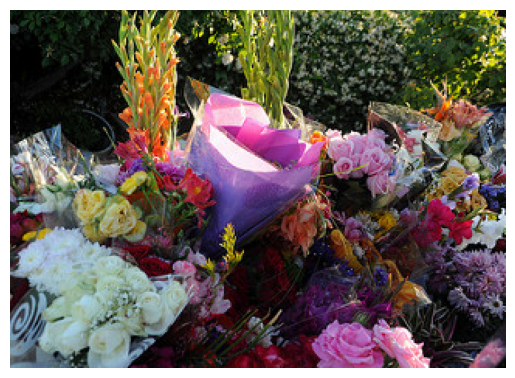

1/1 [==============================] - 0s 164ms/step


In [ ]:
sample_image_path = '/content/flowers/rose/10894627425_ec76bbc757_n.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [ ]:
if prediction > 0.4:
    print("Tulip")
else:
    print("Rose")

Rose


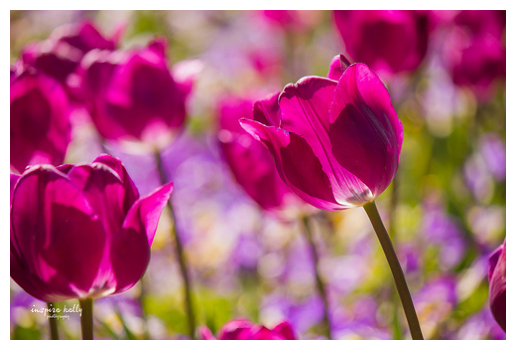

1/1 [==============================] - 0s 36ms/step


In [ ]:
sample_image_path = '/content/flowers/tulip/10686568196_b1915544a8.jpg'
display_image(sample_image_path)
sample_image = load_and_preprocess_image(sample_image_path)
prediction = model.predict(sample_image)

In [ ]:
if prediction > 0.4:
    print("Tulip")
else:
    print("Rose")

Tulip
